In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
journal_entries = pd.read_excel("Vinatics 2019 Journal Entries.xlsx")
journal_entries.head()

,JE Number,GL Code,Period,Effective Date,Entry Date,Source,Source Group,Functional Amount,Preparer
0,210000003,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-302887.20000,Merrie Beaver
1,210000003,60000113,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,250320.00000,Merrie Beaver
2,210000003,20001102,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,52567.20000,Merrie Beaver
3,210000006,60000001,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,-11708.75376,Merrie Beaver
4,210000006,60000112,2019-001,2019-01-18,2019-01-21,Invoice,Purchases,9676.65600,Merrie Beaver


In [2]:
journal_entries_copy = journal_entries.copy()
journal_entries_copy = journal_entries_copy[['GL Code','Source','Effective Date','Functional Amount']]
journal_entries_copy['Month'] = journal_entries_copy['Effective Date'].dt.month_name()
journal_entries_copy.head()

,GL Code,Source,Effective Date,Functional Amount,Month
0,60000001,Invoice,2019-01-18,-302887.20000,January
1,60000113,Invoice,2019-01-18,250320.00000,January
2,20001102,Invoice,2019-01-18,52567.20000,January
3,60000001,Invoice,2019-01-18,-11708.75376,January
4,60000112,Invoice,2019-01-18,9676.65600,January


In [3]:
chart_of_account = pd.read_excel("Vinatics Chart of Accounts.xlsx")
chart_of_account.head()

,Account Number,Account Type,Class,Sub class,Account Name
0,20000050,Assets,Receivables,Trade receivables,Customer invoices
1,20000051,Assets,Receivables,Trade receivables,Credit notes
2,20000000,Assets,Receivables,Trade receivables,Receivables 1
3,20000021,Assets,Receivables,Trade receivables,Receivables 2
4,20000002,Assets,Receivables,Trade receivables,Receivables 3


In [4]:
journal_entries_copy = journal_entries_copy.merge(chart_of_account, how = 'outer', left_on='GL Code', right_on='Account Number').drop(['GL Code','Account Number','Effective Date','Account Name','Sub class'], axis = 1)
journal_entries_copy.head()

,Source,Functional Amount,Month,Account Type,Class
0,Invoice,-302887.20000,January,Liabilities,Payables
1,Invoice,-11708.75376,January,Liabilities,Payables
2,Invoice,-3758.66208,January,Liabilities,Payables
3,Invoice,-18907.95696,January,Liabilities,Payables
4,Invoice,-17307.84000,January,Liabilities,Payables


In [5]:
revenue = journal_entries_copy.copy()

revenue = revenue[revenue['Class'] == 'Revenue from contract with customers']
revenue = revenue.drop('Source', axis=1)
revenue['Functional Amount'] *= -1
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October', 'November','December']

revenue['Month'] = pd.Categorical(revenue['Month'], categories=months, ordered=True)
revenue = revenue.groupby(by = ['Month']).sum()
revenue.rename(columns = {'Functional Amount':'Revenue'}, inplace=True)
revenue['Revenue'] = revenue['Revenue']/1000000
revenue

,Revenue
Month,
January,180.248404
February,158.567306
March,128.781549
April,130.102582
May,141.732235
June,150.187664
July,109.721643
August,113.188569
September,160.290186


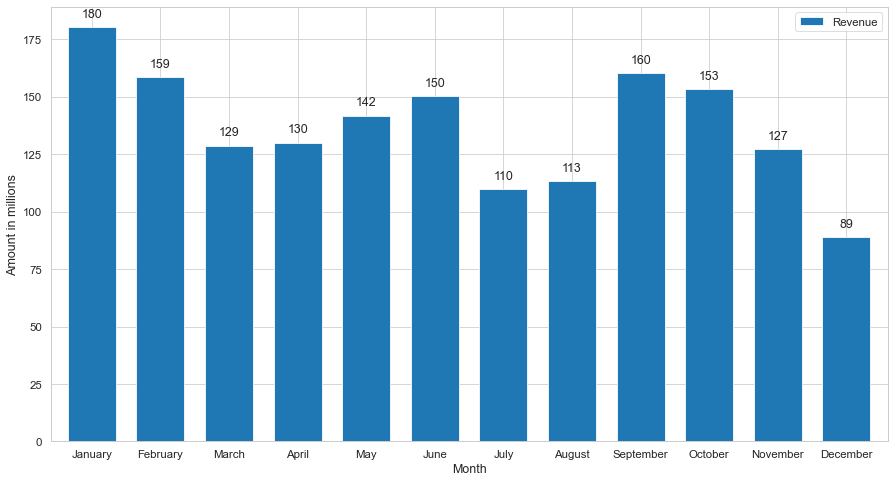

In [6]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = revenue.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.7)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=0)

for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')

In [7]:
cost_of_sales = journal_entries_copy.copy()
cost_of_sales = cost_of_sales[cost_of_sales['Class'] == 'Cost of sales']
cost_of_sales = cost_of_sales.drop('Source', axis=1)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September','October', 'November','December']

cost_of_sales['Month'] = pd.Categorical(cost_of_sales['Month'], categories=months, ordered=True)

cost_of_sales = cost_of_sales.groupby(by = ['Month']).sum()
cost_of_sales.rename(columns = {'Functional Amount':'Cost of Sales'}, inplace=True)
cost_of_sales['Cost of Sales'] = cost_of_sales['Cost of Sales']/1000000
cost_of_sales

,Cost of Sales
Month,
January,11.056896
February,26.980595
March,40.764027
April,65.329842
May,65.013905
June,39.732017
July,77.791537
August,62.682800
September,47.669798


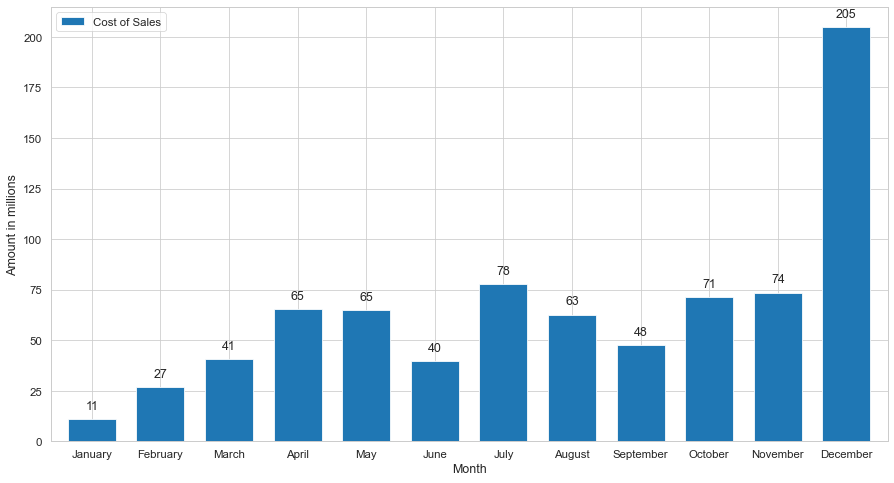

In [8]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = cost_of_sales.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.7)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=0)

for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')

In [9]:
gross_profit = pd.merge(revenue, cost_of_sales, on='Month')
# gp2 = gp.copy()
gross_profit['Gross Profit'] = gross_profit['Revenue'] - gross_profit['Cost of Sales']
gross_profit

,Revenue,Cost of Sales,Gross Profit
Month,,,
January,180.248404,11.056896,169.191508
February,158.567306,26.980595,131.586711
March,128.781549,40.764027,88.017522
April,130.102582,65.329842,64.772740
May,141.732235,65.013905,76.718330
June,150.187664,39.732017,110.455646
July,109.721643,77.791537,31.930107
August,113.188569,62.682800,50.505769
September,160.290186,47.669798,112.620388


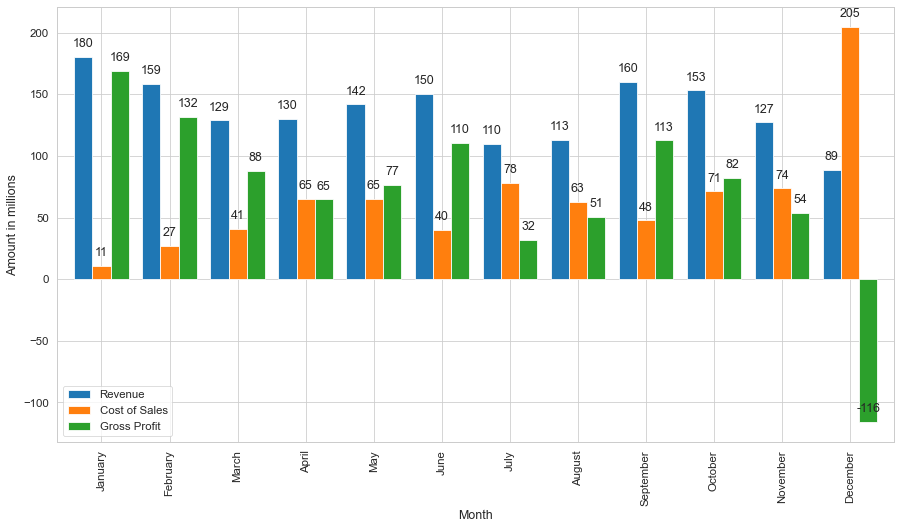

In [10]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = gross_profit.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.8)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=90)
for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')

In [11]:
gp_margin = gross_profit.copy()
gp_margin['Gross Margin'] = round((gp_margin['Gross Profit']/gp_margin['Revenue'])*100,2)
gp_margin

,Revenue,Cost of Sales,Gross Profit,Gross Margin
Month,,,,
January,180.248404,11.056896,169.191508,93.87
February,158.567306,26.980595,131.586711,82.98
March,128.781549,40.764027,88.017522,68.35
April,130.102582,65.329842,64.772740,49.79
May,141.732235,65.013905,76.718330,54.13
June,150.187664,39.732017,110.455646,73.55
July,109.721643,77.791537,31.930107,29.10
August,113.188569,62.682800,50.505769,44.62
September,160.290186,47.669798,112.620388,70.26


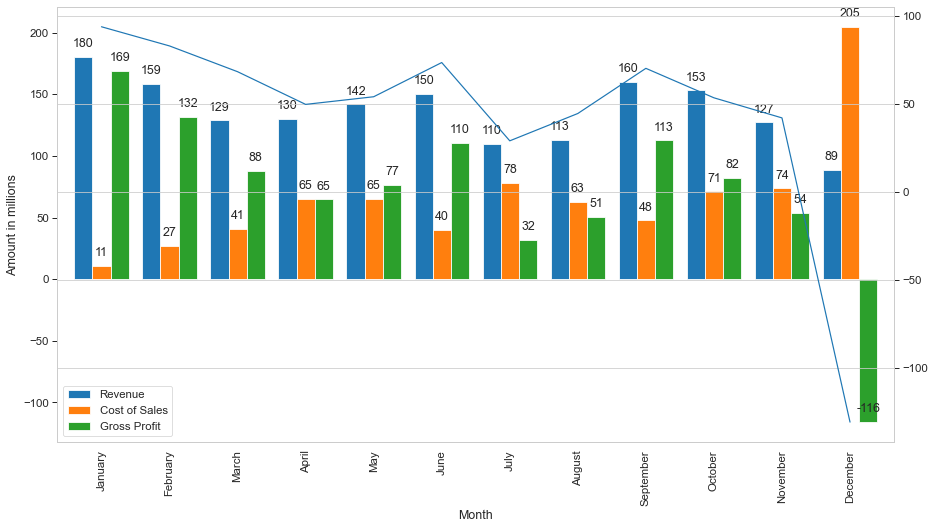

In [12]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = gp_margin[['Revenue', 'Cost of Sales', 'Gross Profit']].plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.8)
gp_margin['Gross Margin'].plot(secondary_y=True)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=90)
for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')

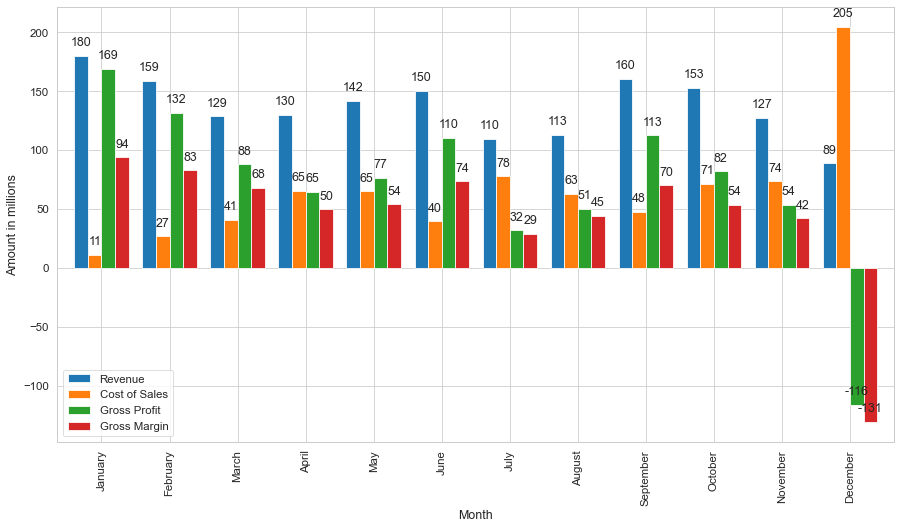

In [13]:
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.3)

bar_cht1 = gp_margin.plot(kind='bar',figsize=(15,8), xlabel='Month', ylabel='Amount in millions', width=0.8)
bar_cht1.set_xticklabels(bar_cht1.get_xticklabels(), rotation=90)
for p in bar_cht1.patches:
    bar_cht1.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', xytext=(0,10), textcoords = 'offset pixels')